In [64]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import numpy as np
from keras.models import Model
from keras.layers import Input,Embedding,Flatten,Dense,LSTM
from keras.initializers import Constant
import pandas as pd
import matplotlib.pyplot as plt
import random

In [65]:
with open ('intents.json',encoding='utf-8') as f:
    data=json.load(f)

In [66]:
x,y=[],[]
resp=dict()
for i in data['intents']:
    for j in i['patterns']:
        x.append(j)
        y.append(i['tag'])
        resp[i['tag']]=i['responses']

In [67]:
x[:20]

['Hi',
 'Hey',
 'Is anyone there?',
 'Hi there',
 'Hello',
 'Hey there',
 'Howdy',
 'Hola',
 'Bonjour',
 'Konnichiwa',
 'Guten tag',
 'Ola',
 'Good morning',
 'Good afternoon',
 'Good evening',
 'Good night',
 'Bye',
 'See you later',
 'Goodbye',
 'Au revoir']

In [68]:
y[:20]

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'morning',
 'afternoon',
 'evening',
 'night',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye']

In [69]:
resp['greeting']

['Hello there. Tell me how are you feeling today?',
 'Hi there. What brings you here today?',
 'Hi there. How are you feeling today?',
 'Great to see you. How do you feel currently?',
 "Hello there. Glad to see you're back. What's going on in your world right now?"]

In [70]:
tokenizer=Tokenizer()

In [71]:
tokenizer.fit_on_texts(x)

In [72]:
seq=tokenizer.texts_to_sequences(x)

In [73]:
seq[:10]

[[95],
 [96],
 [14, 97, 41],
 [95, 41],
 [150],
 [96, 41],
 [151],
 [152],
 [153],
 [154]]

In [74]:
maxlen=max([len(i) for i in seq])
maxlen

18

In [75]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

304

In [76]:
pad_seq=pad_sequences(seq,maxlen=maxlen,padding='post')
pad_seq[:10]

array([[ 95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [ 96,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [ 14,  97,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [ 95,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [150,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [ 96,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [152,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [153,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [154,   0,   0,   0,   0,   0,

In [77]:
le=LabelEncoder()

In [78]:
y_le=le.fit_transform(y)
y_le[:10]

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44], dtype=int64)

In [79]:
pad_seq,y_le=shuffle(pad_seq,y_le)

In [80]:
embedding_matrix=dict()
glove_file=open('glove.6B.100d.txt',encoding='utf-8')
for line in glove_file:
    record=line.split()
    word=record[0]
    vector=np.asarray(record[1:],dtype='float32')
    embedding_matrix[word]=vector
glove_file.close()

In [81]:
embedding_matrix['hello']

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [82]:
embedding_vectors=np.zeros((vocab_size,100))
for word,index in tokenizer.word_index.items():
    vec=embedding_matrix.get(word)
    if vec is not None:
        embedding_vectors[index]=vec

In [83]:
embedding_vectors[1]

array([-0.046539  ,  0.61966002,  0.56647003, -0.46584001, -1.18900001,
        0.44599   ,  0.066035  ,  0.31909999,  0.14679   , -0.22119001,
        0.79238999,  0.29905   ,  0.16073   ,  0.025324  ,  0.18678001,
       -0.31000999, -0.28108001,  0.60514998, -1.0654    ,  0.52476001,
        0.064152  ,  1.03579998, -0.40779001, -0.38011   ,  0.30801001,
        0.59964001, -0.26991001, -0.76034999,  0.94221997, -0.46919   ,
       -0.18278   ,  0.90652001,  0.79671001,  0.24824999,  0.25713   ,
        0.6232    , -0.44768   ,  0.65357   ,  0.76902002, -0.51229   ,
       -0.44332999, -0.21867   ,  0.38370001, -1.14830005, -0.94397998,
       -0.15062   ,  0.30012   , -0.57805997,  0.20175   , -1.65910006,
       -0.079195  ,  0.026423  ,  0.22051001,  0.99713999, -0.57538998,
       -2.72659993,  0.31448001,  0.70521998,  1.43809998,  0.99125999,
        0.13976   ,  1.34739995, -1.1753    ,  0.0039503 ,  1.02980006,
        0.064637  ,  0.90886998,  0.82871997, -0.47003001, -0.10

In [84]:
df=pd.DataFrame(data=y,columns=['y'])
df['y'].nunique()

80

In [85]:
i=Input(shape=(maxlen,))
x=Embedding(vocab_size,100,embeddings_initializer=Constant(embedding_vectors),trainable=False)(i)
x=LSTM(15,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(80,activation='softmax')(x)
model=Model(inputs=i,outputs=x)

In [86]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 18, 100)             │          30,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 15)              │           6,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │          21,680 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,040 (230.62 KB)

 Trainable params: 59,040 (230.62 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history=model.fit(pad_seq,y_le,epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0091 - loss: 4.4097  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0502 - loss: 4.3034
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0970 - loss: 4.2008
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0939 - loss: 4.0749
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0946 - loss: 3.9176
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0987 - loss: 3.7723
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1429 - loss: 3.6414
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2127 - loss: 3.3637
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2287 - loss: 3.2415
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2342 - loss: 3.0270
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2967 - loss: 2.8264
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3589 - lo

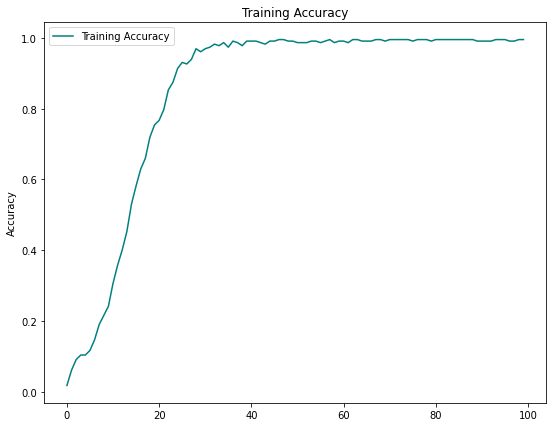

In [89]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

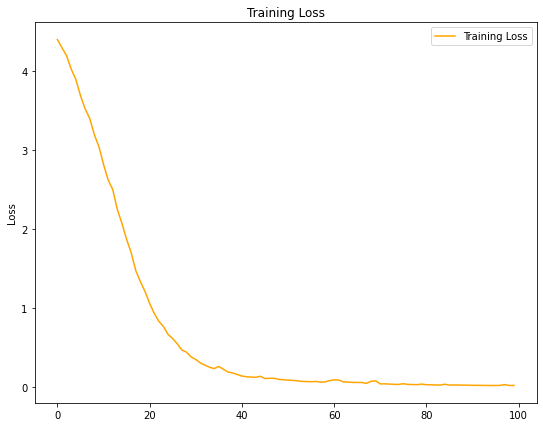

In [90]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
while True:
    input_text=input('You: ')
    seq_in=tokenizer.texts_to_sequences([input_text])[0]
    pad_in=np.array(pad_sequences([seq_in],maxlen=maxlen,padding='post'))
    y_pred=le.inverse_transform([np.argmax(model.predict(pad_in))])[0]
    print('AliTech:',random.choice(resp[y_pred]))
    if y_pred=='goodbye':
        break

You: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: Hi there. How are you feeling today?
You: good morning
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
AliTech: Good morning. I hope you had a good night's sleep. How are you feeling today? 
You: what can you do
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
AliTech: I can provide general advice regarding anxiety and depression, answer questions related to mental health and make daily conversations. Do not consider me as a subsitute for an actual mental healthcare worker. Please seek help if you don't feel satisfied with me.
You: my name is ali
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
AliTech: That's a great name. Tell me more about yourself.
You: could you help me?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AliTech: Tell me your problem so that i can assist you
You: tell me a joke
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
AliTech: mental health is not a joke.
You: What is mental health?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
AliTech: Mental health is a state of 